In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [26]:
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", 
    "restecg", "thalach", "exang", "oldpeak", "slope", 
    "ca", "thal", "num"
]

df = pd.read_csv("processed.cleveland.data", names=columns)

# Show first rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [28]:
df.shape    

(303, 14)

In [29]:
df.isnull().sum()  # missing count

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [30]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

In [31]:
# Convert ca and thal to numeric
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

In [32]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [33]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [34]:
print("ca unique values:", df['ca'].unique())
print("thal unique values:", df['thal'].unique())

ca unique values: [ 0.  3.  2.  1. nan]
thal unique values: [ 6.  3.  7. nan]


In [35]:
# Convert to numeric if possible
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

In [36]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [37]:
df = df.dropna()

In [38]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [39]:
print("Dataset shape after dropping missing rows:", df.shape)

Dataset shape after dropping missing rows: (297, 14)


In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# List of categorical columns to one-hot encode
categorical_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']

# One-hot encoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # drop_first to avoid dummy variable trap
    ],
    remainder='passthrough'  # keep other columns as-is
)

# Apply transformation
X = df.drop('num', axis=1)  # features
y = df['num']               # target

X_encoded = preprocessor.fit_transform(X)

print("Shape before encoding:", X.shape)
print("Shape after encoding:", X_encoded.shape)


Shape before encoding: (297, 13)
Shape after encoding: (297, 20)


In [42]:
# One-Hot Encoding already applied, numeric columns are at the end
# Identify number of numeric columns
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# After one-hot encoding, numeric columns are at the last positions
X_numeric = X_encoded[:, -len(numeric_cols):]  # select numeric columns
X_categorical = X_encoded[:, :-len(numeric_cols)]  # one-hot encoded categorical columns

# Scale numeric features
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Combine categorical + scaled numeric features
X_final = np.hstack((X_categorical, X_numeric_scaled))

print("Shape after scaling:", X_final.shape)


Shape after scaling: (297, 20)


In [43]:
print("Mean of numeric features:", X_numeric_scaled.mean(axis=0))
print("Std of numeric features:", X_numeric_scaled.std(axis=0))

Mean of numeric features: [-2.36156026e-16  5.60718699e-17  5.14365953e-16 -2.50454352e-17
 -2.79985537e-16]
Std of numeric features: [1. 1. 1. 1. 1.]


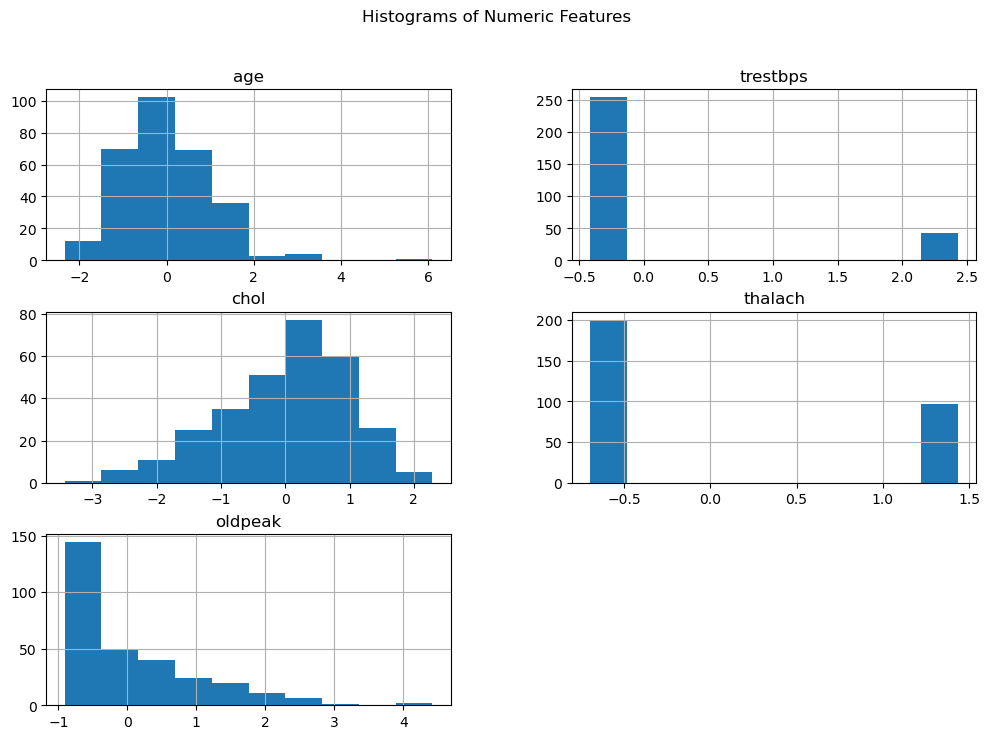

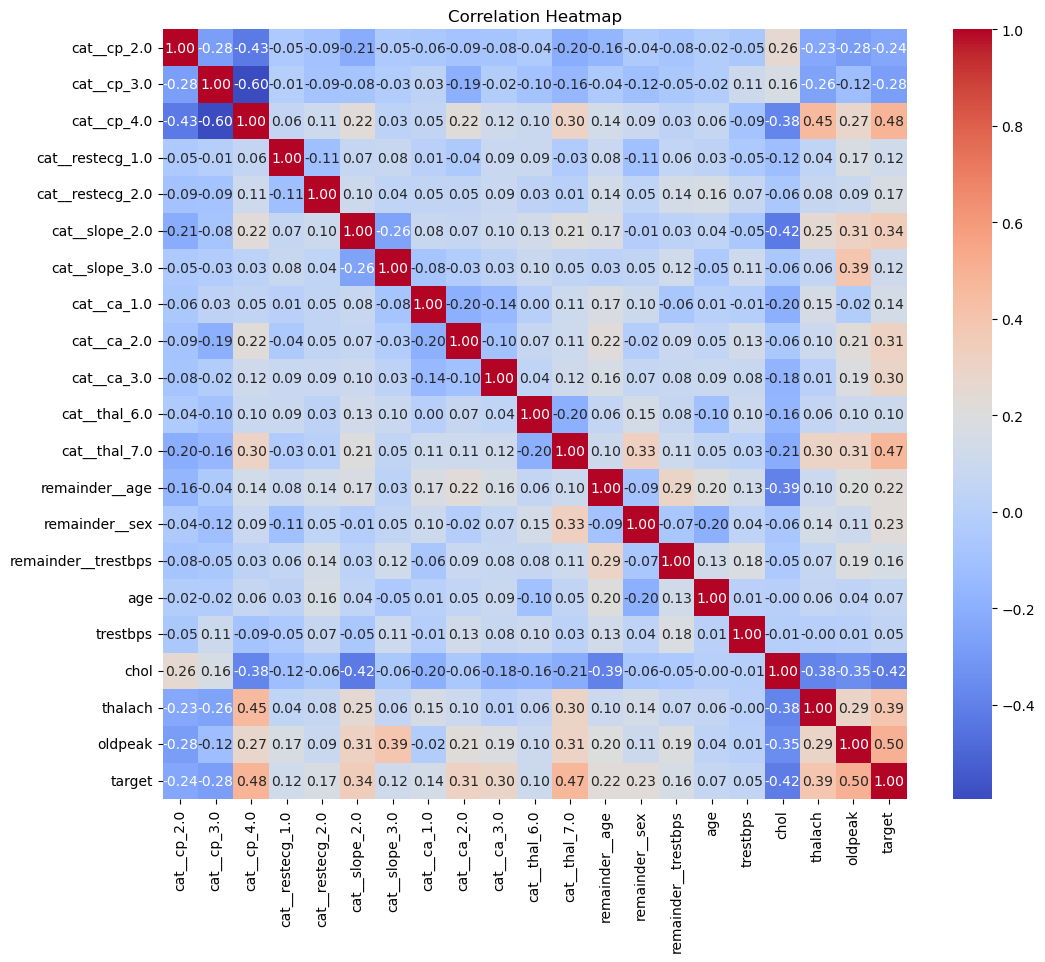

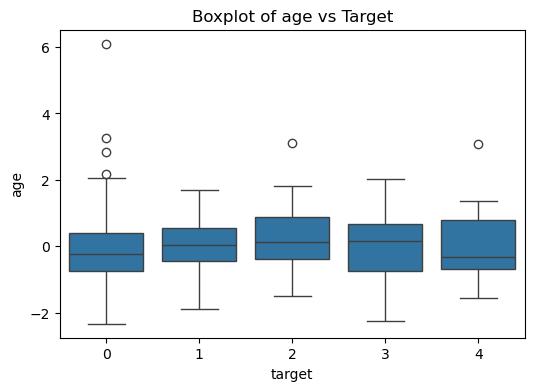

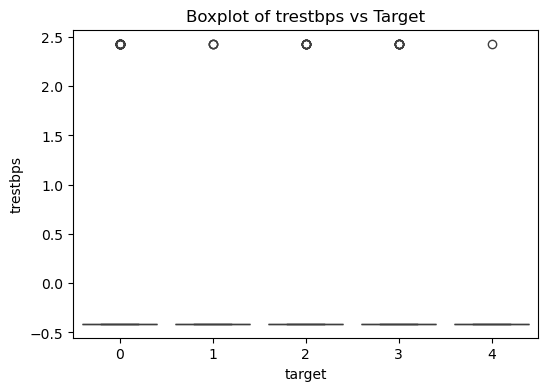

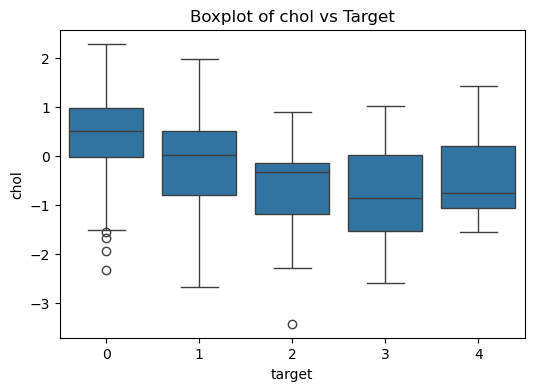

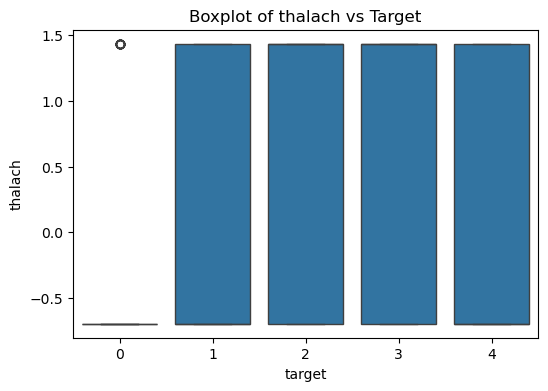

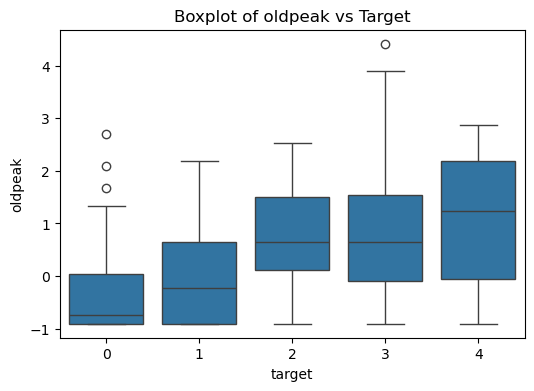

In [44]:
# Recreate a full dataframe for easier EDA
# Convert X_final back to DataFrame
encoded_feature_names = preprocessor.get_feature_names_out()
numeric_df = pd.DataFrame(X_numeric_scaled, columns=numeric_cols)
categorical_df = pd.DataFrame(X_categorical, columns=encoded_feature_names[:-len(numeric_cols)])
df_final = pd.concat([categorical_df.reset_index(drop=True), numeric_df.reset_index(drop=True)], axis=1)
df_final['target'] = y.reset_index(drop=True)


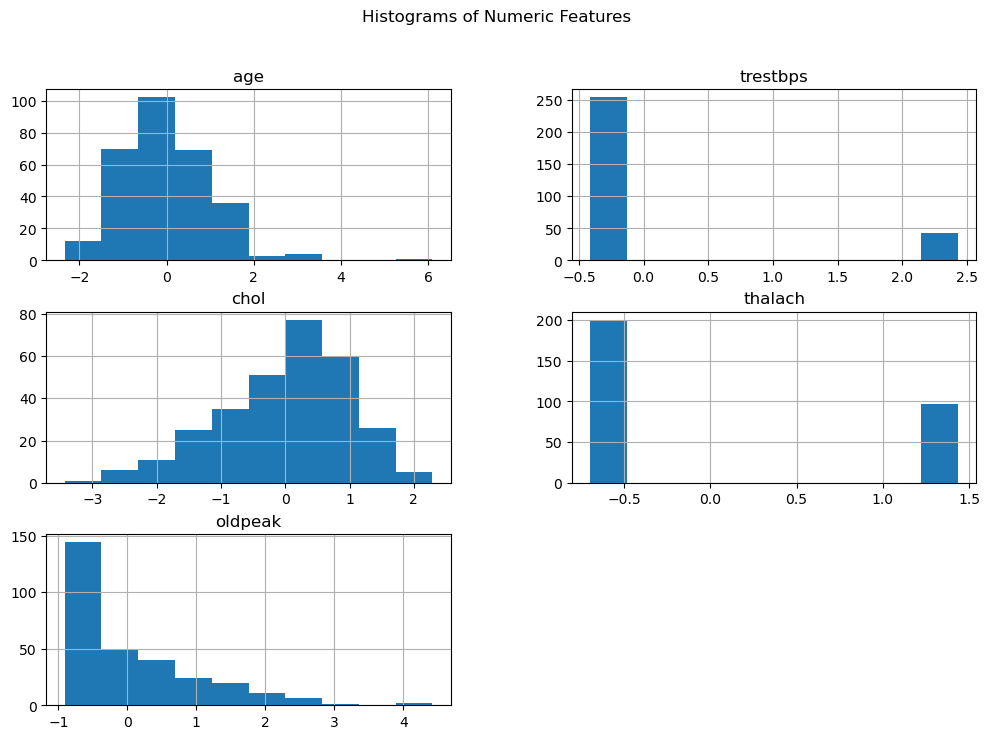

In [45]:
# 1️⃣ Histograms for numeric features
df_final[numeric_cols].hist(figsize=(12,8))
plt.suptitle("Histograms of Numeric Features")
plt.show()

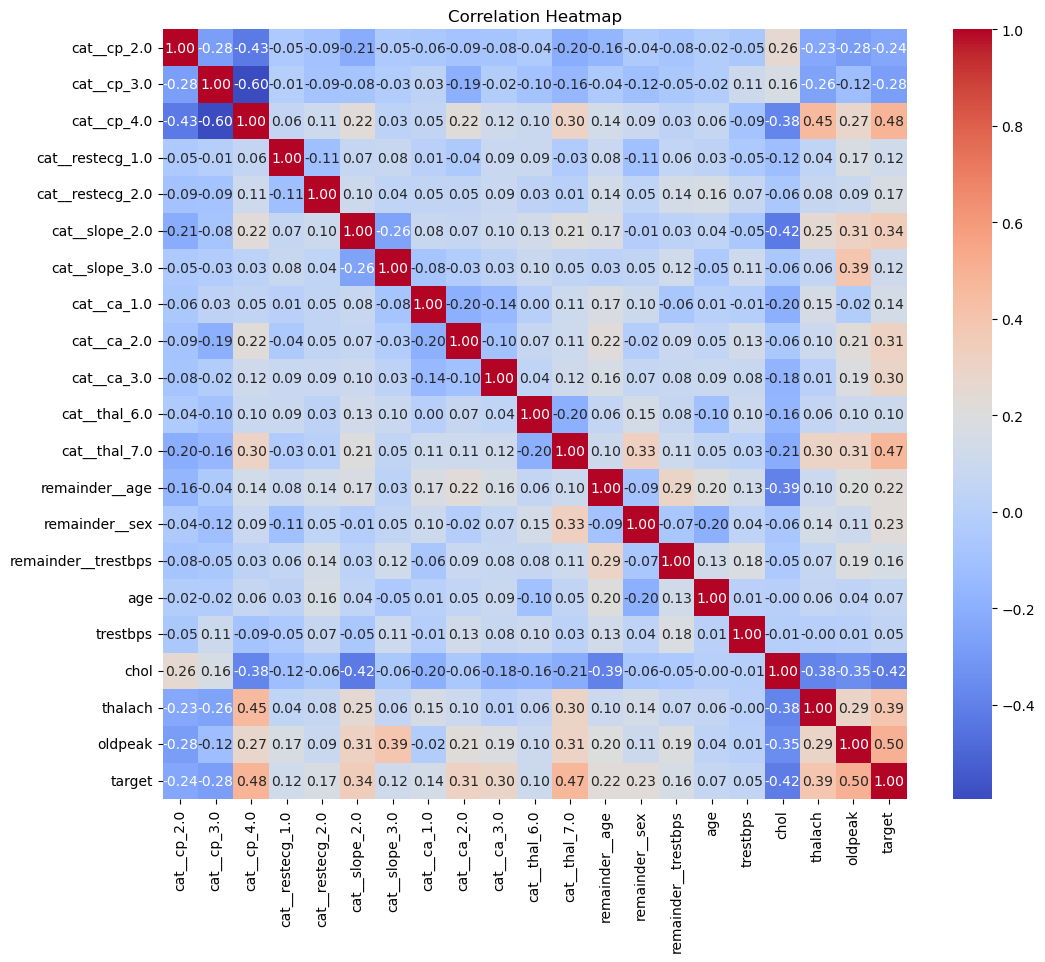

In [46]:
# 2️⃣ Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_final.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

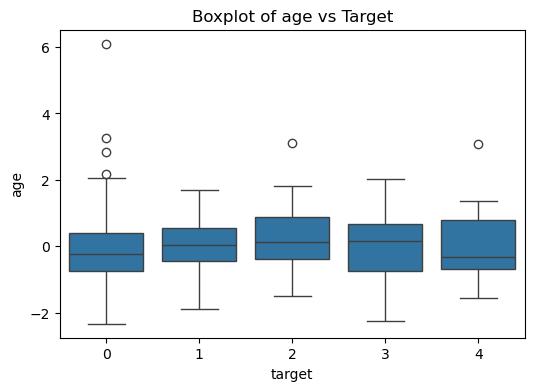

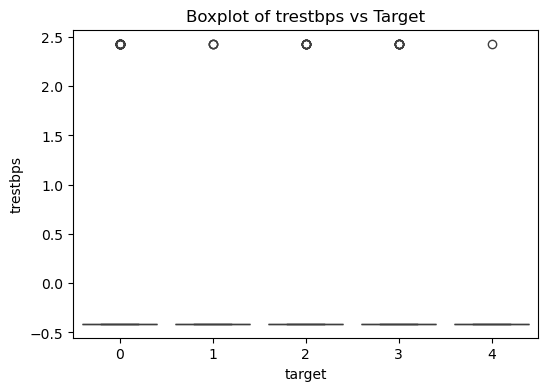

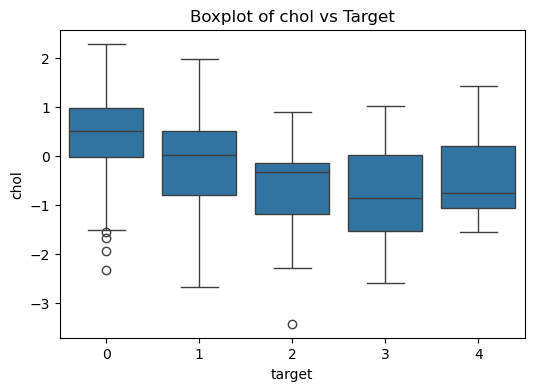

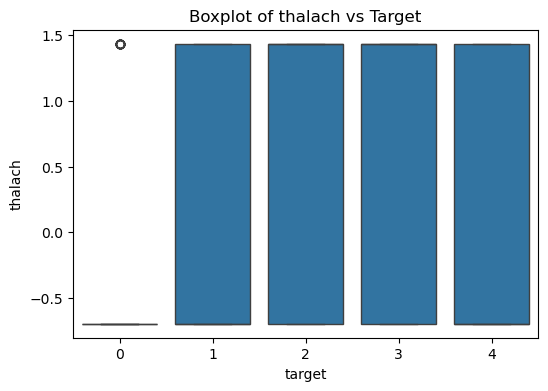

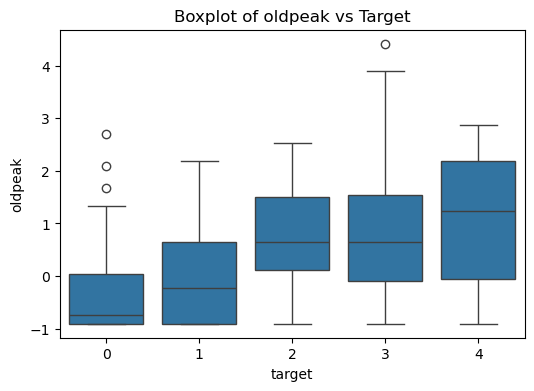

In [47]:
# 3️⃣ Boxplots to detect outliers
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='target', y=col, data=df_final)
    plt.title(f"Boxplot of {col} vs Target")
    plt.show()